In [24]:
sig.kaiserord(60, 5/(500/2))

(364, 5.65326)

In [4]:
import scipy.signal as signal

<IPython.core.display.Javascript object>


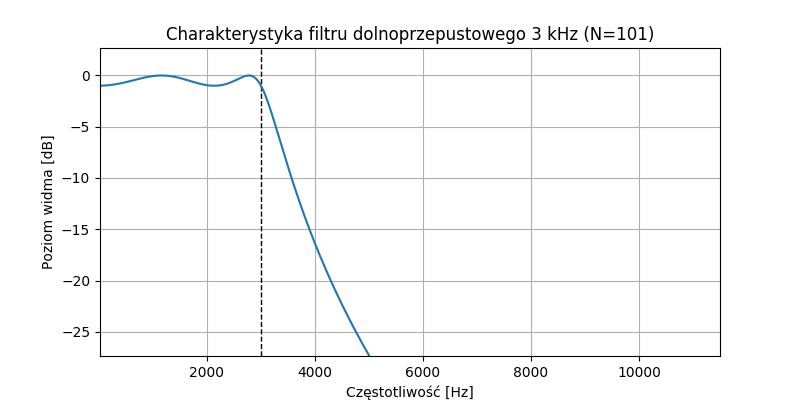

In [10]:
fs = 48000
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
bc1, ac1 = signal.cheby1(N, Rp, fc, 'low', fs=fs)

w, hfdp = sig.freqz(bc1,ac1, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

<IPython.core.display.Javascript object>


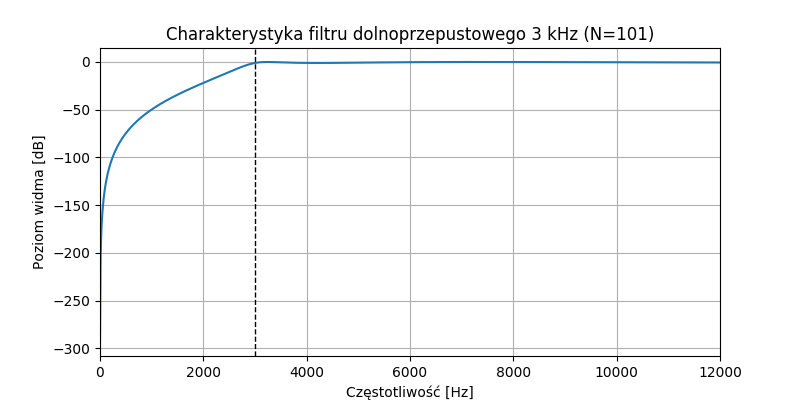

In [11]:
fs = 48000
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
bc1, ac1 = signal.cheby1(N, Rp, fc, 'high', fs=fs)

w, hfdp = sig.freqz(bc1,ac1, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

<IPython.core.display.Javascript object>


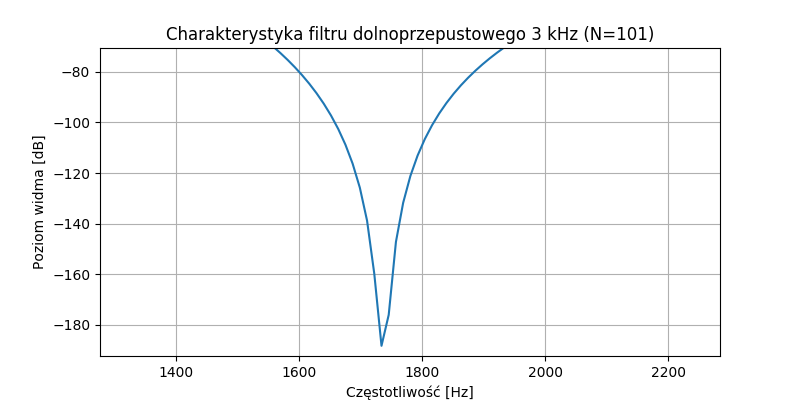

In [14]:
fs = 48000
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
bc1, ac1 = signal.cheby1(N, Rp, (1000,fc), 'bandstop', fs=fs)

w, hfdp = sig.freqz(bc1,ac1, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

<ipython-input-15-0b7634eab202>:10: RuntimeWarning: divide by zero encountered in log10
  spdp = 20 * np.log10(np.abs(hfdp))


<IPython.core.display.Javascript object>


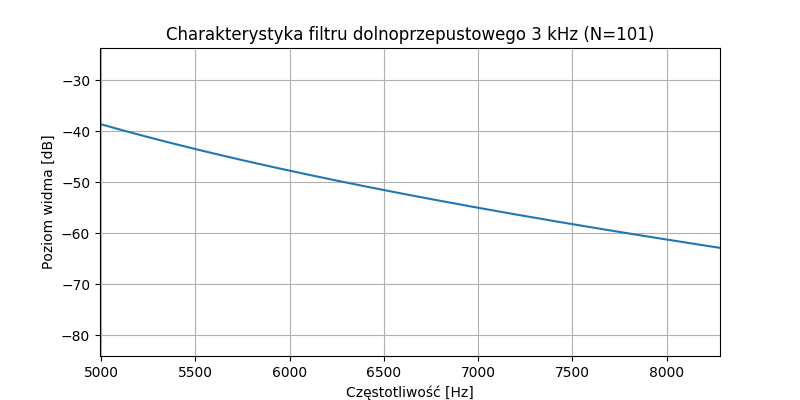

In [15]:
fs = 48000
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
bc1, ac1 = signal.cheby1(N, Rp, (1000,fc), 'bandpass', fs=fs)

w, hfdp = sig.freqz(bc1,ac1, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

In [38]:
20*np.log10(1-0.001)

-0.008690235480353834

<IPython.core.display.Javascript object>


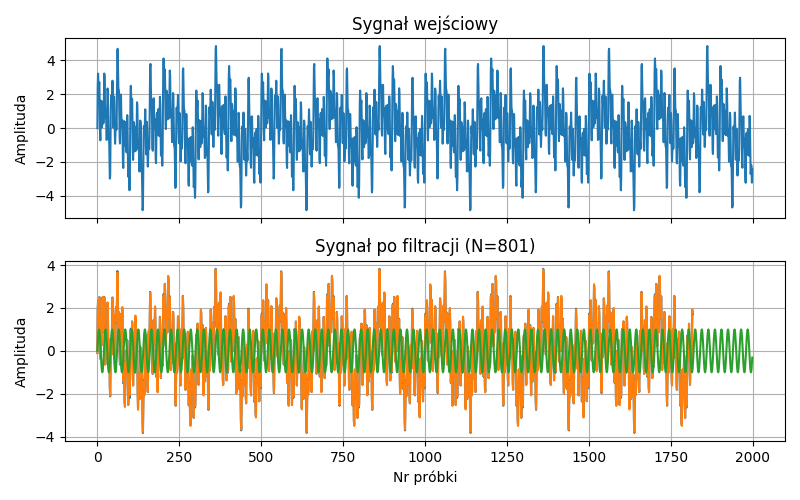

In [73]:
import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8, 4)


n = 2000
fs=500
t = np.arange(n) / 500
fr = np.array([3,10,25,35,50,100]).reshape(-1, 1)
fr2 = np.array([25]).reshape(-1, 1)
x = np.sum(np.sin(2 * np.pi * t * fr), axis=0)
x2 = np.sum(np.sin(2 * np.pi * t * fr2), axis=0)
# x = x + 0.05 * np.random.randn(len(x))
# x = x / np.max(np.abs(x))

h = sig.firwin2(365, [0,19.5,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1], window=('kaiser',5.65326/2),  fs=500)
h1 = sig.firls(365, [0,19.5,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1],   fs=500)
# h2 = sig.firls(365, [0,19,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1],  fs=500)
y = sig.lfilter(h, 1, x)
y1 = sig.lfilter(h1, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[364//2:n])
ax[1].plot(y1[364//2:n])
ax[1].plot(x2[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()

In [17]:
20*np.log10(0.001)

-60.0

In [44]:
N

22

<IPython.core.display.Javascript object>


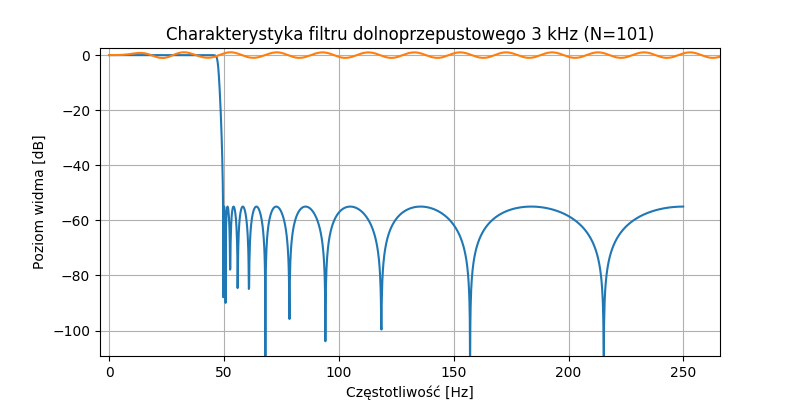

In [43]:
fs = 500
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
N, fn = signal.cheb2ord(45, 50, .0086, 55, fs=500)
bb, ab = signal.cheby2(N, 55,fn, 'low', fs=fs)
wb, hb = signal.freqz(bb, ab, 2048, fs=fs)
hbd = 20 * np.log10(np.abs(hb))

w, hfdp = sig.freqz(bb,ab, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
# plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

In [62]:
N

22

<IPython.core.display.Javascript object>


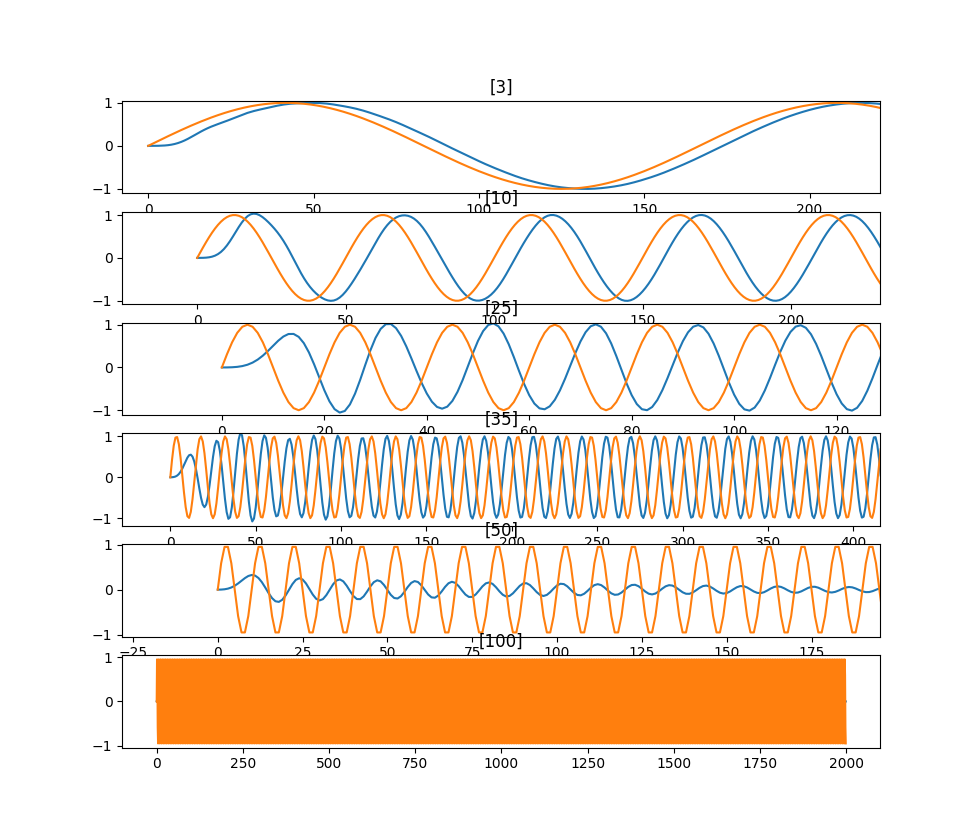

In [61]:
n = 2000
fs=500
t = np.arange(n) / 500
fig,ax = plt.subplots(len(fr))
i = 0
for f in fr:
    x=np.sin(2 * np.pi * t * f)
    y1 = signal.lfilter(bb, ab, x)
    ax[i].plot(y1)
    ax[i].plot(x)
    ax[i].set_title(str(f))
    i=i+1

In [131]:
N

5

<IPython.core.display.Javascript object>


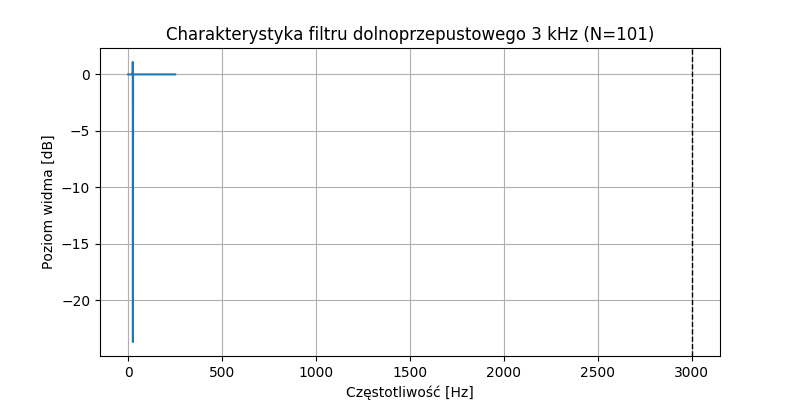

In [130]:
fs = 500
fr = np.array([25]).reshape(-1, 1)
t = np.arange(n*50) / 500
x = np.sum(np.sin(2 * np.pi * t * fr), axis=0)

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
k=4.2
N, fn = signal.ellipord([24.5,25.5], [19.5+k,30.5-k], .0086, 55, fs=500)
bb, ab = signal.ellip(N, .0086, 55,fn, fs=fs,btype='bandstop')
wb, hb = signal.freqz(bb, ab, 2048, fs=fs)
hbd = 20 * np.log10(np.abs(hb))

w, hfdp = sig.freqz(bb,ab, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
# plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

<IPython.core.display.Javascript object>


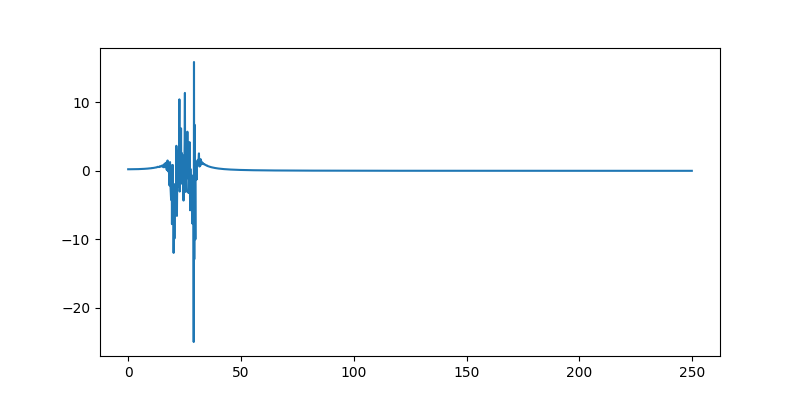

In [104]:
plt.figure()
plt.plot(*signal.group_delay((bb, ab), 2048, fs=500))

<IPython.core.display.Javascript object>


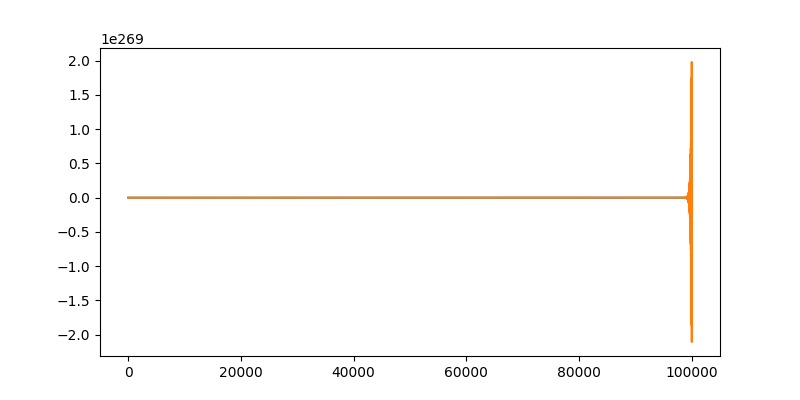

In [126]:
y = signal.lfilter(bb,ab,x)
plt.figure()
plt.plot(x)
plt.plot(y)

<IPython.core.display.Javascript object>


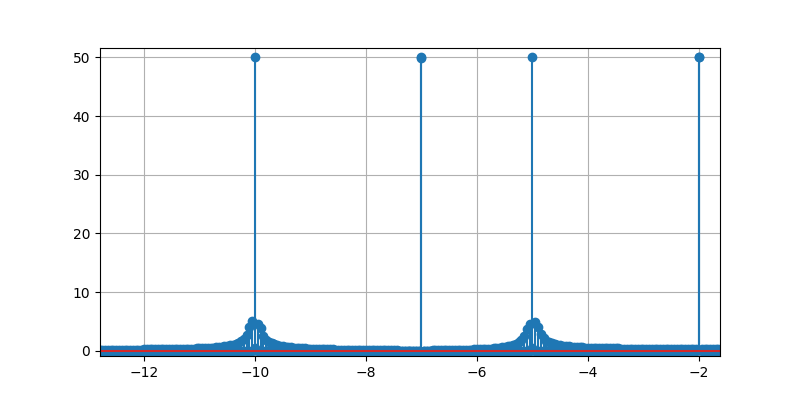

<ipython-input-87-1dfdfe17700b>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(xf, Fs/N * np.abs(yf))
<ipython-input-87-1dfdfe17700b>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(xf, Fs/N * np.abs(yf_x))


In [87]:
from scipy.fft import fft, fftfreq



N=len(y)

yf = fft(y)
yf_x = fft(x)
xf = fftfreq(N, 1/Fs)
import matplotlib.pyplot as plt
plt.figure()
plt.stem(xf, Fs/N * np.abs(yf))
plt.stem(xf, Fs/N * np.abs(yf_x))
plt.grid()


<IPython.core.display.Javascript object>


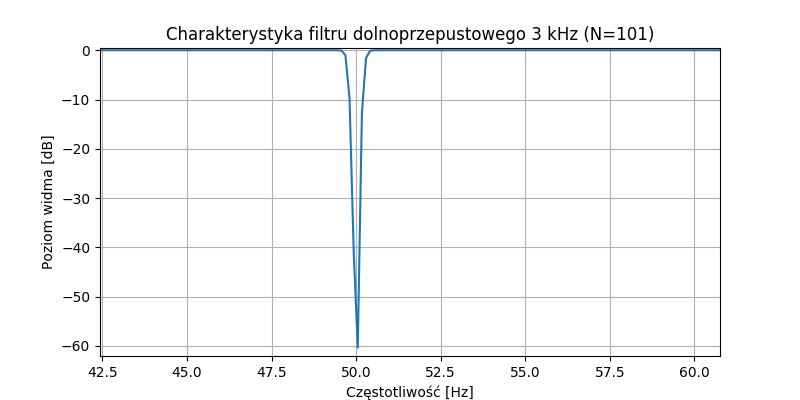

In [71]:
fs = 500
N = 4  # długość filtru

# filtr dolnoprzepustowy
fc = 3000  # częstotliwość graniczna
Rp=1
N, fn = signal.ellipord([24.5+25,25.5+25], [19.5+25,30.5+25], .0086, 55, fs=500)
bb_50, ab_50 = signal.ellip(N, .0086, 55,fn, fs=fs,btype='bandstop')
wb_50, hb_50 = signal.freqz(bb_50, ab_50, 2048, fs=fs)
hbd = 20 * np.log10(np.abs(hb_50))

w_50, hfdp_50 = sig.freqz(bb_50,ab_50, worN=2048, fs=fs)
spdp = 20 * np.log10(np.abs(hfdp_50))
# spdp = np.abs(hfdp)
plt.figure()
plt.axvline(fc, ls='--', c='k', lw=1)
plt.plot(w, spdp)
# plt.xlim(0, 12000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Poziom widma [dB]')
plt.title('Charakterystyka filtru dolnoprzepustowego 3 kHz (N=101)')
plt.grid()

<IPython.core.display.Javascript object>


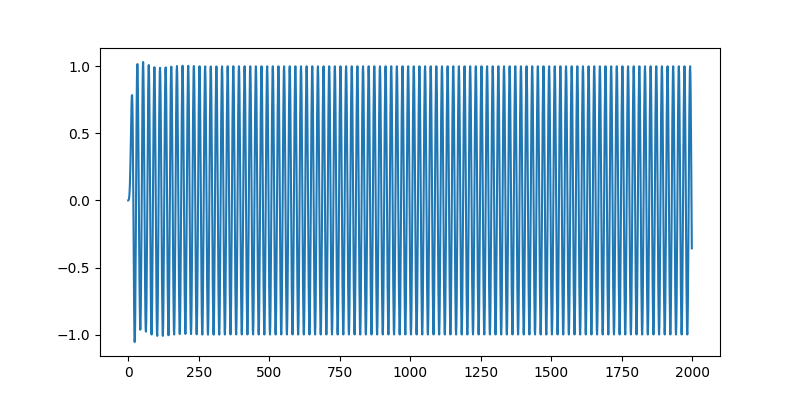

In [47]:
plt.figure()
plt.plot(y1)


In [185]:

np.sum(((y[364//2:364//2+500]-x2[:500])**2))/500

0.010867609060011064

In [186]:
np.sum(((y1[364//2:364//2+500]-x2[:500])**2))/500

0.008286686138336195

<IPython.core.display.Javascript object>


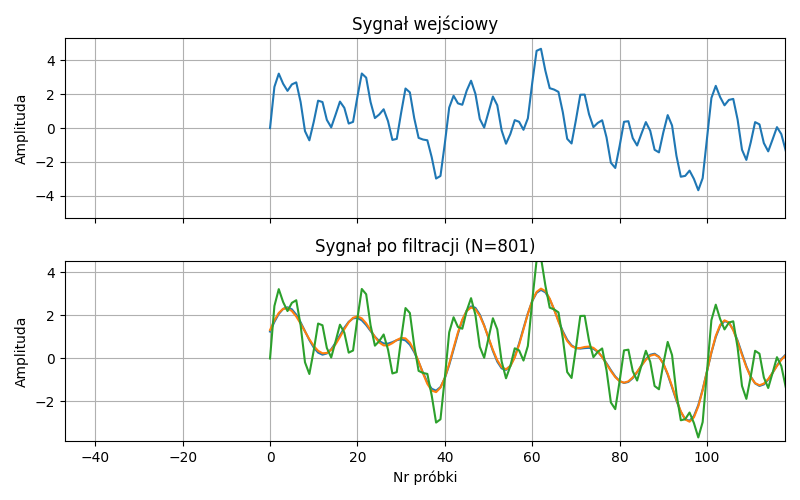

In [167]:
h = sig.firwin(127, 45, window=('kaiser',5.65326), pass_zero='lowpass', fs=500)
y = sig.lfilter(h, 1, x)
h1 = sig.firls(127, [0,45,50,fs/2], [1,1,0,0],   fs=500)
y = sig.lfilter(h, 1, x)
y1 = sig.lfilter(h1, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[127//2:n])
ax[1].plot(y1[127//2:n])
ax[1].plot(x[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()

In [ ]:
hp, 

<IPython.core.display.Javascript object>


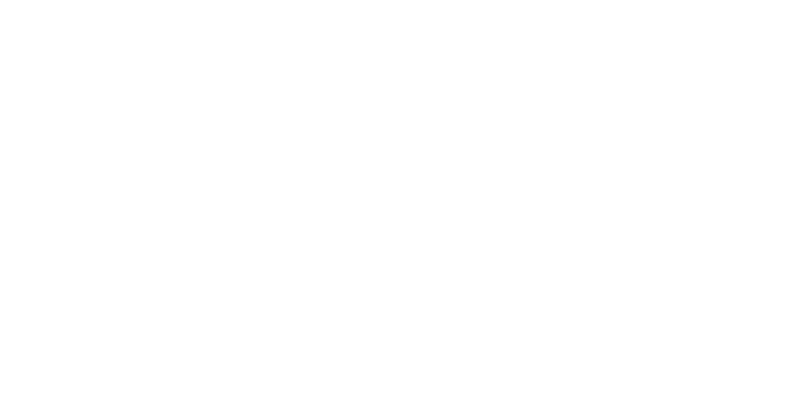

<IPython.core.display.Javascript object>


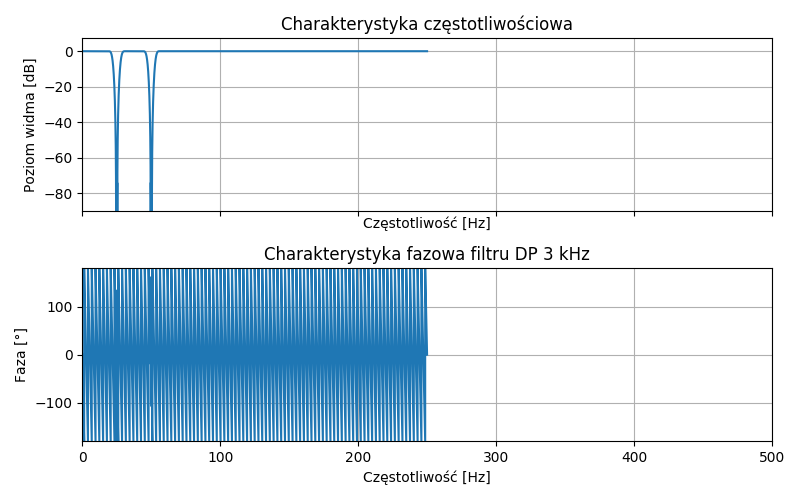

Text(0.5, 1.0, 'Charakterystyka fazowa filtru DP 3 kHz')

In [16]:
w, hf = sig.freqz(h1, worN=200048, fs=500)
hfdb = 20 * np.log10(np.abs(hf))
phase = np.degrees(np.angle(hf))

plt.figure()
fig1, ax1 = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax1[0].plot(w, hfdb)
ax1[0].set_xlim(0, 500)
ax1[0].set_ylim(bottom=-90)
ax1[0].set_xlabel('Częstotliwość [Hz]')
ax1[0].set_ylabel('Poziom widma [dB]')
ax1[0].set_title('Charakterystyka częstotliwościowa')
ax1[0].grid()


ax1[1].axvline(3000, c='k', lw=1, ls='--')
ax1[1].plot(w, phase)
ax1[1].grid()
ax1[1].set_ylim(-180, 180)
ax1[1].set_xlabel('Częstotliwość [Hz]')
ax1[1].set_ylabel('Faza [°]')
ax1[1].set_title('Charakterystyka fazowa filtru DP 3 kHz')


<IPython.core.display.Javascript object>


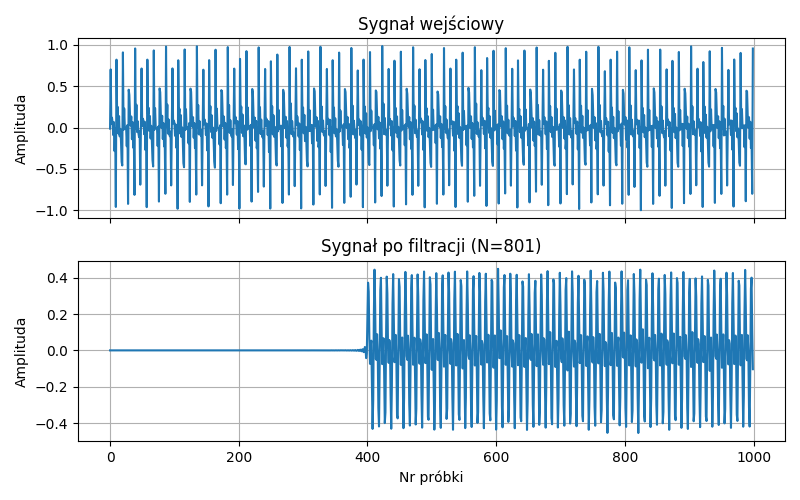

In [189]:
import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (8, 4)


n = 1000
fs = 4800
t = np.arange(n) / fs
fr = np.array([500, 1000, 1500, 2000, 2500]).reshape(-1, 1)
x = np.sum(np.sin(2 * np.pi * t * fr), axis=0)
x = x + 0.05 * np.random.randn(len(x))
x = x / np.max(np.abs(x))

h = sig.firwin2(801, [0, 1250, 1300, fs/2], [1,1,0,0], window='hamming', fs=fs)
y = sig.lfilter(h, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()